In [1]:
import sys
import os
path = os.getcwd()
sys.path.insert(1, path[:-4])

In [2]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook 

In [3]:
from core.subgraph_specializer import Graph
import numpy as np
from importlib import reload
import networkx as nx
import matplotlib.pyplot as plt
import time
import autograd.numpy as anp
import networkx as nx
import scipy.linalg as la

In [4]:
def doubling(x):
    return 2*x % 1

def lin1(x):
    return .1*x

def lin2(x):
    return (1/3) * x

def lin3(x):
    return 1.3*x + 5

def lin4(x):
    return (1-.1)*x + 1.75

def lin5(x):
    return (1-.1)*x + 1.25

def lin6(x):
    return (1-.1)*x + .25

def sig1(x):
    return anp.tanh(x)

def sig2(x):
    return -2*anp.tanh(x)

def sig3(x):
    return 1 / (1 + anp.exp(-x)) + 1.25

def iden(x):
    return x

def zero(x):
    return 0*x

def fun1(x):
    return 1/8 * x**2

def per1(x):
    return anp.sin(x)

def per2(x):
    return 5*anp.cos(10*x)

def fun2(x):
    return anp.log(anp.abs(x)+1)

def fun3(x):
    return anp.exp(-anp.abs(x))

def fun4(x):
    return anp.exp(x)

6.7864937280012665


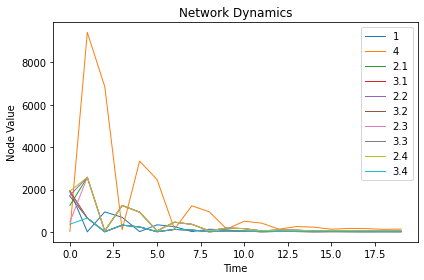

In [6]:
A = np.array([
    [0,0,0,1],
    [1,0,1,0],
    [1,1,0,0],
    [0,1,1,0]
])

f = np.array([
    [sig1,zero,zero,lin1],
    [lin3,sig3,fun2,zero],
    [lin2,fun3,sig1,zero],
    [zero,lin2,lin3,sig1]
])

labels = ['1','2','3','4']

G = Graph(A,labels=labels,F=f)
base = [0,3]
G = G.specialize(base)
print(G.spectral_radius())
k = G.iterate(20,2000*np.random.random(G.n),graph=True,title='ex:sync2.pdf', save=True)

1.692813201143146
1.8609812253748919


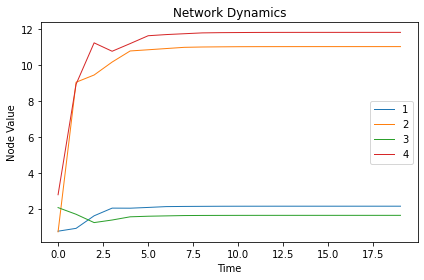

In [6]:
G = Graph(A,labels=labels,F=f)
# print(G.stability_matrix()[1:3,:][:,1:3])
print(np.max(np.abs(la.eig(G.stability_matrix()[1:3,:][:,1:3])[0])))
print(G.spectral_radius())
k = G.iterate(20,3*np.random.random(G.n),graph=True,title='ex:sync1.pdf',save=True)

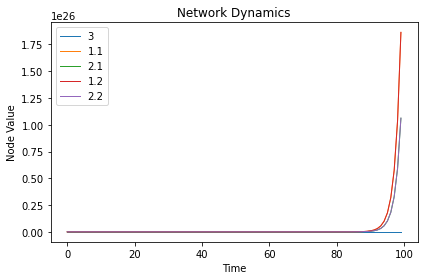

In [7]:
A= np.array(
    [
        [0,1,1],
        [0,0,1],
        [1,0,0]
    ]
)

f = np.array(
    [
        [lin4,sig1,sig2],
        [zero,lin5,sig1],
        [sig1,zero,lin6]
    ]
)

labels = ['1','2','3']

G = Graph(A,labels=labels,F=f)
base = ['3']
G = G.specialize(base)
k = G.iterate(100,10*np.random.random(G.n),graph=True)
# G.A.toarray()

In [8]:
k[:4]

array([[ 5.58389475,  6.11013561,  1.00773208,  5.40730779,  1.59244894],
       [ 7.27545521, 13.55110187,  5.84013468, 13.55110187,  5.84013468],
       [ 8.79790969, 27.89195145, 14.01224146, 27.89195145, 14.01224146],
       [10.16811872, 53.7055127 , 28.72203458, 53.7055127 , 28.72203458]])

In [9]:
def x1(x):
    return .9*x[0] + np.tanh(x[1]) - 2*np.tanh(x[2]) + 1.75

def x2(x):
    return .9*x[1] + np.tanh(x[2]) + 1.25

def x3(x):
    return .9*x[2] + np.tanh(x[0]) + .25

print(x1(k[0]), x2(k[0]), x3(k[0]))
print(x1(k[1]), x2(k[1]), x3(k[1]))
print(x1(k[2]), x2(k[2]), x3(k[2]))


6.245850705422972 7.51394440330607 2.156930626302226
7.297943525708651 14.44597476660488 6.506120249953385
8.668118720683129 27.352756305416143 13.861017267049162


In [10]:
for j in range(G.n):
    print(G.original(j))

2
0
1
0
1


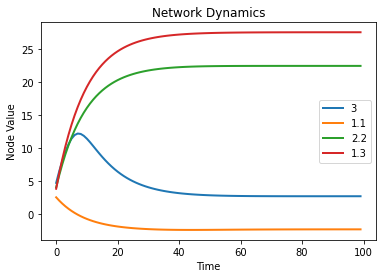

In [11]:
import core.specializer as s

A= np.array(
    [
        [0,1,1],
        [0,0,1],
        [1,0,0]
    ]
)

f = np.array(
    [
        [zero,sig1,sig2],
        [zero,zero,sig1],
        [sig1,zero,zero]
    ]
)

a = np.array([lin4,lin5,lin6])

labels = ['1','2','3']

G = s.DirectedGraph(A, (a, f), labels)
base = ['3']
G.specialize(base)
k = G.iterate(100,5*np.random.random(G.n),graph=True)
# G.A